## Importing Libraries

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [65]:
def read_data(file_path):
    data = pd.read_csv(file_path, header=None)
    return data

In [72]:
def plot_data(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[0], data[1], marker='o', color='blue', edgecolors='black', s=80, alpha=0.7)
    plt.xticks(np.arange(5, 30, step=5))
    plt.yticks(np.arange(-5, 30, step=5))
    plt.xlabel("Population of City (10,000s)", fontsize=12)
    plt.ylabel("Profit ($10,000)", fontsize=12)
    plt.title("Profit Prediction", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [73]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y) ** 2
    return 1 / (2 * m) * np.sum(square_err)

In [74]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for _ in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions - y))
        descent = alpha * 1 / m * error
        theta -= descent
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

In [75]:
def plot_cost_function_surface(theta0_vals, theta1_vals, J_vals):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap="viridis", edgecolor="none", alpha=0.8)
    ax.set_xlabel("Theta0", fontsize=12)
    ax.set_ylabel("Theta1", fontsize=12)
    ax.set_zlabel("Cost", fontsize=12)
    ax.view_init(30, 120)
    ax.set_title("Cost Function Surface Plot", fontsize=14, fontweight='bold')
    fig.colorbar(surf, ax=ax, shrink=0.7, aspect=10)  # Add colorbar with adjusted size and aspect
    plt.show()

In [76]:
def plot_cost_function_contour(theta0_vals, theta1_vals, J_vals):
    fig, ax = plt.subplots(figsize=(12, 8))
    contour = ax.contour(theta0_vals, theta1_vals, J_vals, levels=50, cmap="plasma", linewidths=2)
    ax.set_xlabel("Theta0", fontsize=14)
    ax.set_ylabel("Theta1", fontsize=14)
    ax.set_title("Cost Function Contour Plot", fontsize=16, fontweight='bold', color='navy')
    plt.colorbar(contour, ax=ax, label="Cost", orientation="vertical", pad=0.05)  # Add colorbar with adjusted size and aspect
    ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)  # Add grid lines with solid style and slightly increased transparency
    ax.tick_params(axis='both', labelsize=12)  # Adjust tick label font size
    plt.show()

## Main Code

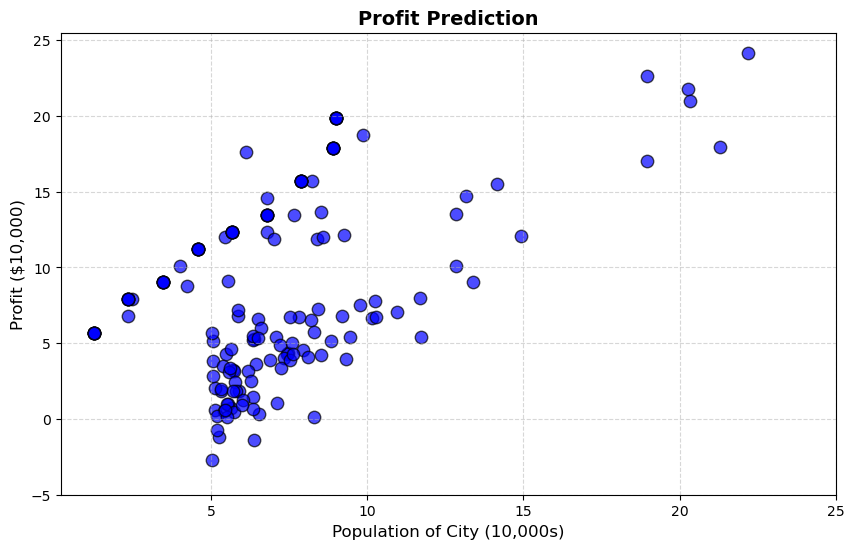

Initial Cost: 53.6364097944575
Optimal Parameters: theta0 = 2.42, theta1 = 0.84


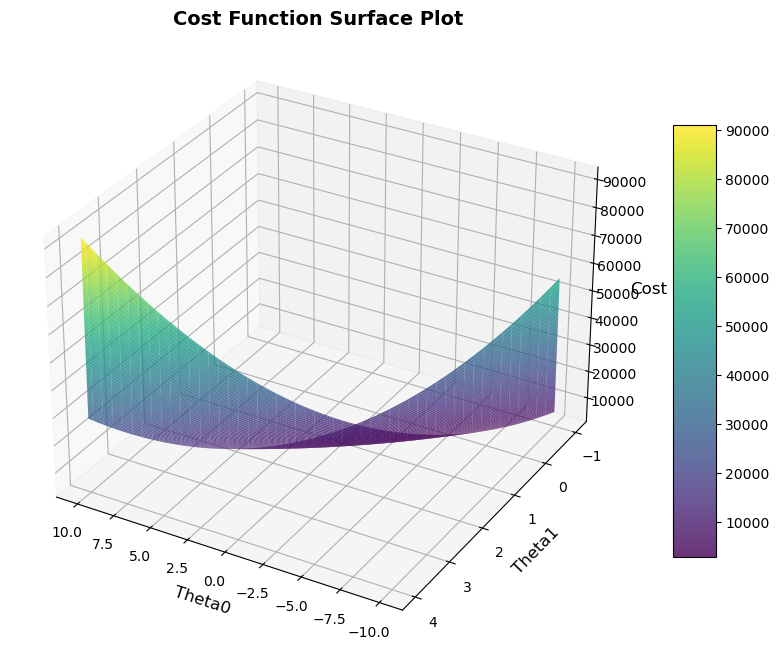

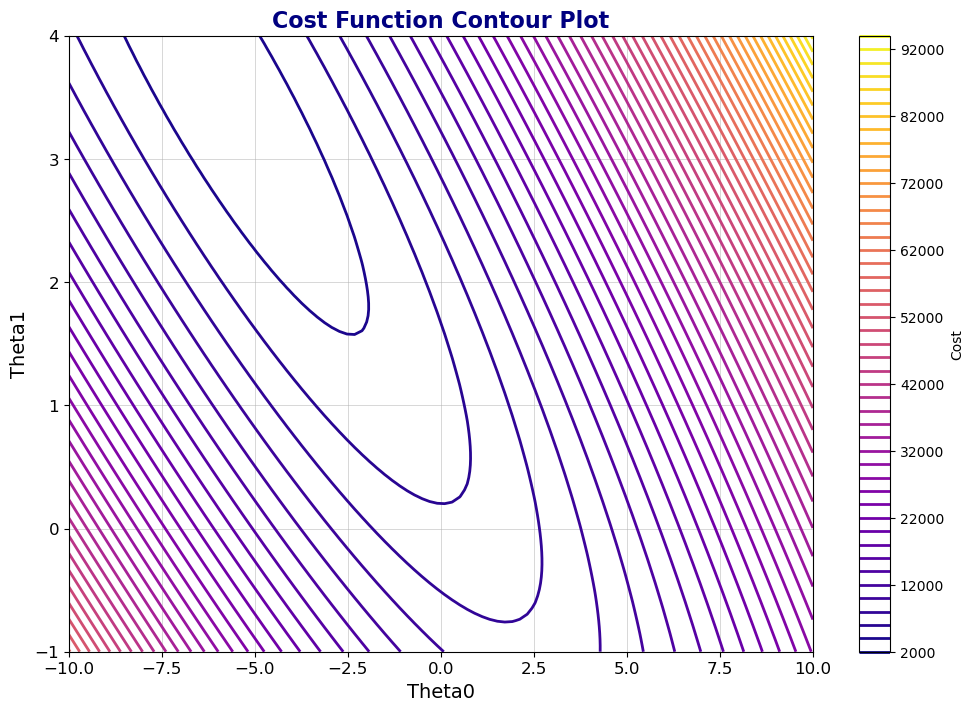

In [77]:
def main():
    data = read_data("./sample.txt")

    # Display data head and describe
    print("Data Head:")
    print(data.head())

    print("\nData Description:")
    print(data.describe())

    plot_data(data)

    data_n = data.values
    m = data_n[:, 0].size
    X = np.append(np.ones((m, 1)), data_n[:, 0].reshape(m, 1), axis=1)
    y = data_n[:, 1].reshape(m, 1)
    theta = np.zeros((2, 1))

    initial_cost = compute_cost(X, y, theta)
    print(f"\nInitial Cost: {initial_cost}")

    alpha = 0.01
    num_iters = 1500
    theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)
    print(f"Optimal Parameters: theta0 = {round(theta[0, 0], 2)}, theta1 = {round(theta[1, 0], 2)}")

    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-1, 4, 100)
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            t = np.array([theta0, theta1])
            J_vals[i, j] = compute_cost(X, y, t)

    plot_cost_function_surface(theta0_vals, theta1_vals, J_vals)
    plot_cost_function_contour(theta0_vals, theta1_vals, J_vals)

if __name__ == "__main__":
    main()